In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()

spark-2.4.0-bin-hadoop2.7/
spark-2.4.0-bin-hadoop2.7/python/
spark-2.4.0-bin-hadoop2.7/python/setup.cfg
spark-2.4.0-bin-hadoop2.7/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.0-bin-hadoop2.7/python/pyspark

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS9_K273_ONLINE_Đinh Viết Trung'

/content/gdrive/My Drive/LDS9_K273_ONLINE_Đinh Viết Trung


In [4]:
# import libraries
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from pyspark.sql.functions import mean, stddev, col, log
from pyspark.sql.functions import to_date, dayofweek, to_timestamp
from pyspark.sql import types 
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType
from pyspark.sql.functions import year, month
from pyspark.sql.functions import dayofmonth, weekofyear
from pyspark.sql.functions import split, explode
from pyspark.sql.functions import coalesce, first, lit
from pyspark.ml.feature import Binarizer
from pyspark.ml.feature import Bucketizer
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.sql.functions import regexp_extract, col
from pyspark.sql.functions import datediff
from pyspark.sql.functions import when

In [5]:
from pyspark import SparkContext
sc = SparkContext()

In [6]:
spark = SparkSession(sc)

In [7]:
data = spark.read.csv("data/data3D.csv", header=True, inferSchema=True)


In [9]:
data.show(3)


+------+-----------------+------------------+------------------+
|    id|                x|                 y|                 z|
+------+-----------------+------------------+------------------+
|point0|5.647627534046943|-6.356222340123802|-7.240816026826695|
|point1|4.414367138680041|-10.32624175635328| 8.963324308916228|
|point2|5.005396944639823|-9.301070062115645| 10.35473056351597|
+------+-----------------+------------------+------------------+
only showing top 3 rows



In [10]:
from pyspark.sql.functions import col


In [11]:
data = data.select(['x', 'y', 'z'])

In [12]:
data.show(3)


+-----------------+------------------+------------------+
|                x|                 y|                 z|
+-----------------+------------------+------------------+
|5.647627534046943|-6.356222340123802|-7.240816026826695|
|4.414367138680041|-10.32624175635328| 8.963324308916228|
|5.005396944639823|-9.301070062115645| 10.35473056351597|
+-----------------+------------------+------------------+
only showing top 3 rows



### **Format from data**

In [13]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [14]:
data.columns


['x', 'y', 'z']

In [15]:
vec_assembler = VectorAssembler(inputCols = data.columns, 
 outputCol='features')


In [ ]:
final_data = vec_assembler.transform(data)


In [ ]:
from pyspark.ml.feature import StandardScaler


In [ ]:
scaler = StandardScaler(inputCol="features", 
                        outputCol="scaledFeatures", 
                        withStd=True, 
                        withMean=False)


In [ ]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)


In [ ]:
# Normalize each feature to have unit standard deviation.
final_data = scalerModel.transform(final_data)

In [ ]:
final_data.show(3, False)


### **Train the Model and Evaluate**

In [ ]:
from pyspark.ml.clustering import KMeans


In [55]:
# Trains a k-means model.
k_list = []
wssse_list = []
for k in range(2,11): 
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(final_data)
    wssse = model.computeCost(final_data)
    k_list.append(k)
    wssse_list.append(wssse)
    print("With k =", k, "Set Sum of Squared Errors = " + str(wssse))

With k = 2 Set Sum of Squared Errors = 1155067.2563008652
With k = 3 Set Sum of Squared Errors = 297656.4092004272
With k = 4 Set Sum of Squared Errors = 146718.50451770384
With k = 5 Set Sum of Squared Errors = 72720.18503668686
With k = 6 Set Sum of Squared Errors = 68619.11979544407
With k = 7 Set Sum of Squared Errors = 64316.007170342855
With k = 8 Set Sum of Squared Errors = 60180.40208558786
With k = 9 Set Sum of Squared Errors = 61447.835661510646
With k = 10 Set Sum of Squared Errors = 54106.016174775345


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

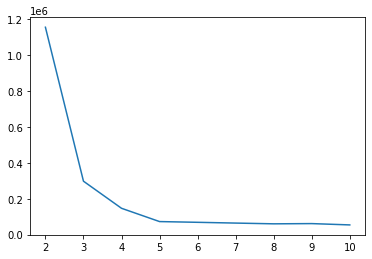

In [57]:
plt.plot(k_list, wssse_list)
plt.show()

In [58]:
'''According to Elbow Method, we choose k = 5. Look like there is very little gain after k=5, so
we stick to that choice when processing the full data set.'''


'According to Elbow Method, we choose k = 5. Look like there is very little gain after k=5, so\nwe stick to that choice when processing the full data set.'

In [59]:
# Trains a k-means model.
kmeans = KMeans(featuresCol='scaledFeatures',k=5)
model = kmeans.fit(final_data)

In [60]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse = model.computeCost(final_data)
print("Within Set Sum of Squared Errors = " + str(wssse))


Within Set Sum of Squared Errors = 72720.18503668686


In [61]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[-1.59030525  0.93719373  0.31581855]
[ 0.35334174 -0.87989203 -1.07356186]
[ 0.74896823 -1.2269015   1.46702482]
[-0.45182036  1.15367577  0.72369935]
[ 1.19780907 -0.73650031 -0.99420862]


In [62]:
predictions = model.transform(final_data)

In [63]:
predictions.select("prediction").show(5)


+----------+
|prediction|
+----------+
|         4|
|         2|
|         2|
|         2|
|         0|
+----------+
only showing top 5 rows



In [64]:
# Check number points of each cluster
predictions.groupBy('prediction').count().show()


+----------+------+
|prediction| count|
+----------+------+
|         1|200014|
|         3|200017|
|         4|199986|
|         2|200000|
|         0|199983|
+----------+------+



In [65]:
# Our clustering algorithm created 5 equally sized clusters with K=5


In [66]:
data_result = predictions.select("prediction")
data_result.columns


['prediction']

In [67]:
type(data_result)

pyspark.sql.dataframe.DataFrame

In [68]:
final_data.show(3, False)


+-----------------+------------------+------------------+---------------------------------------------------------+------------------------------------------------------------+
|x                |y                 |z                 |features                                                 |scaledFeatures                                              |
+-----------------+------------------+------------------+---------------------------------------------------------+------------------------------------------------------------+
|5.647627534046943|-6.356222340123802|-7.240816026826695|[5.647627534046943,-6.356222340123802,-7.240816026826695]|[1.0159673512169785,-0.8133579916042443,-1.1300631023636738]|
|4.414367138680041|-10.32624175635328|8.963324308916228 |[4.414367138680041,-10.32624175635328,8.963324308916228] |[0.7941127247055376,-1.3213715327025202,1.3988923401033733] |
|5.005396944639823|-9.301070062115645|10.35473056351597 |[5.005396944639823,-9.301070062115645,10.35473056351597] |

In [69]:
temp = final_data.select("scaledFeatures").rdd.map(lambda x: \
                        x[0].toArray().tolist()).toDF()

In [70]:
temp.show(3)


+------------------+-------------------+-------------------+
|                _1|                 _2|                 _3|
+------------------+-------------------+-------------------+
|1.0159673512169785|-0.8133579916042443|-1.1300631023636738|
|0.7941127247055376|-1.3213715327025202| 1.3988923401033733|
|0.9004347126254749|-1.1901880174546249|   1.61604698992401|
+------------------+-------------------+-------------------+
only showing top 3 rows



In [71]:
import pyspark.sql.functions as f


In [72]:
# since there is no common column between these two dataframes add row_index so t
temp=temp.withColumn('row_index', f.monotonically_increasing_id())
data_result=data_result.withColumn('row_index', 
    f.monotonically_increasing_id())
temp = temp.join(data_result, 
    on=["row_index"]).sort("row_index").drop("row_index")


In [73]:
temp.show(3)


+------------------+-------------------+-------------------+----------+
|                _1|                 _2|                 _3|prediction|
+------------------+-------------------+-------------------+----------+
|1.0159673512169785|-0.8133579916042443|-1.1300631023636738|         4|
|0.7941127247055376|-1.3213715327025202| 1.3988923401033733|         2|
|0.9004347126254749|-1.1901880174546249|   1.61604698992401|         2|
+------------------+-------------------+-------------------+----------+
only showing top 3 rows



In [74]:
temp = temp.select(col("_1").alias("x_scale"), 
                col("_2").alias("y_scale"), 
                col("_3").alias("z_scale"), 
                "prediction")

In [75]:
df = temp.toPandas()


In [76]:
df.head(3)


,x_scale,y_scale,z_scale,prediction
0,1.015967,-0.813358,-1.130063,4
1,0.794113,-1.321372,1.398892,2
2,0.900435,-1.190188,1.616047,2


In [77]:
centers_df = pd.DataFrame(centers)
centers_df.head()

,0,1,2
0,-1.590305,0.937194,0.315819
1,0.353342,-0.879892,-1.073562
2,0.748968,-1.226902,1.467025
3,-0.451820,1.153676,0.723699
4,1.197809,-0.736500,-0.994209


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

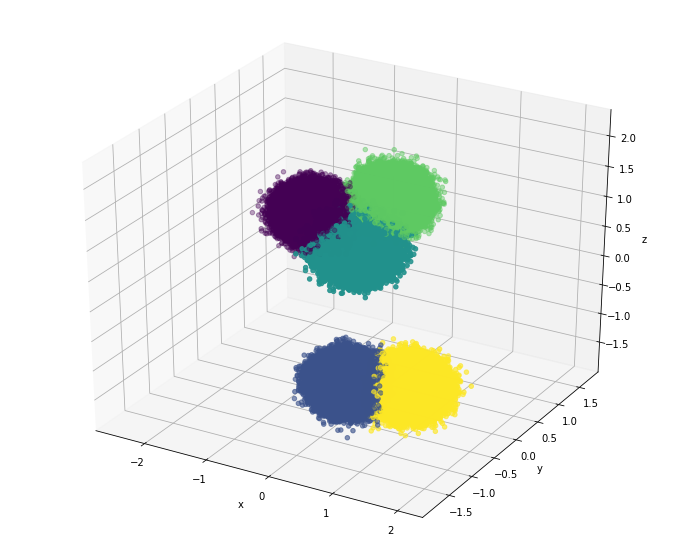

In [80]:
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(df.x_scale, df.y_scale, 
                    df.z_scale, 
                    c=df.prediction)

threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()


### **Combine results**

In [82]:
# since there is no common column between these two dataframes add row_index so t
final_data=final_data.withColumn('row_index', f.monotonically_increasing_id())
temp=temp.withColumn('row_index', f.monotonically_increasing_id())


In [84]:
final_data2 = final_data.join(temp, on=["row_index"]).sort("row_index").drop("row_index")

In [86]:
final_data2.show(5)

+-----------------+------------------+------------------+--------------------+--------------------+-------------------+-------------------+-------------------+----------+
|                x|                 y|                 z|            features|      scaledFeatures|            x_scale|            y_scale|            z_scale|prediction|
+-----------------+------------------+------------------+--------------------+--------------------+-------------------+-------------------+-------------------+----------+
|5.647627534046943|-6.356222340123802|-7.240816026826695|[5.64762753404694...|[1.01596735121697...| 1.0159673512169785|-0.8133579916042443|-1.1300631023636738|         4|
|4.414367138680041|-10.32624175635328| 8.963324308916228|[4.41436713868004...|[0.79411272470553...| 0.7941127247055376|-1.3213715327025202| 1.3988923401033733|         2|
|5.005396944639823|-9.301070062115645| 10.35473056351597|[5.00539694463982...|[0.90043471262547...| 0.9004347126254749|-1.1901880174546249|   1.6